# Visualizing Dummy Data

## Dummy data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array([1,2,3,4,5]).reshape((-1, 1))
y = np.array([3, 6, 13, 28, 55])

## Linear Regression

In [6]:
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

## polynomial Regression(degree2)

In [7]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

## Plot

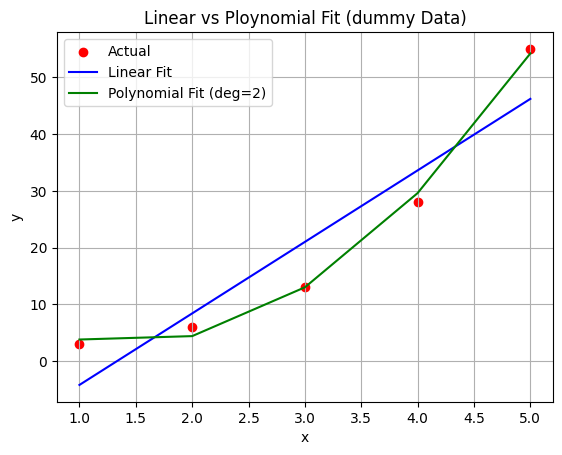

In [8]:
plt.scatter(x,y, color='red', label='Actual')
plt.plot(x, y_pred_linear, color='blue', label='Linear Fit')
plt.plot(x, y_pred_poly, color='green', label='Polynomial Fit (deg=2)')
plt.title("Linear vs Ploynomial Fit (dummy Data)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Real Dataset: Salary Prediction

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Load dataset

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [12]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [13]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


##Train-Test split

In [14]:
x = df[["Years of Experience"]]
y = df["Salary"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear regression

## Train linear regression

In [15]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred_lin = lin_model.predict(x_test)

## metrics

In [16]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_lin)
print("Root Mean Squared Error:", rmse_lin)
print("R-squared:", r2_lin)

Linear Regression Metrics:
Mean Squared Error: 946833177.7094355
Root Mean Squared Error: 30770.654489455297
R-squared: 0.6669549610495003


# Polynomial Regression(Degree 2 and 4)

## Degree 2

In [17]:
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)

poly2_model = LinearRegression()
poly2_model.fit(x_train_poly2, y_train)
y_pred_poly2 = poly2_model.predict(x_test_poly2)

In [18]:
x_train_poly2

array([[  1.,   3.,   9.],
       [  1.,   6.,  36.],
       [  1.,  10., 100.],
       ...,
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   2.,   4.]])

In [19]:
x_test_poly2

array([[ 1.,  2.,  4.],
       [ 1.,  8., 64.],
       [ 1.,  3.,  9.],
       ...,
       [ 1.,  1.,  1.],
       [ 1.,  3.,  9.],
       [ 1.,  0.,  0.]])

## Metrics

In [20]:
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
rmse_poly2 = np.sqrt(mse_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)



## Degree 4

In [21]:
poly4 = PolynomialFeatures(degree=4)
x_train_poly4 = poly4.fit_transform(x_train)
x_test_poly4 = poly4.transform(x_test)

poly4_model = LinearRegression()
poly4_model.fit(x_train_poly4, y_train)
y_pred_poly4 = poly4_model.predict(x_test_poly4)

In [22]:
x_train_poly4

array([[1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       ...,
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]])

In [23]:
mse_poly4 = mean_squared_error(y_test, y_pred_poly4)
rmse_poly4 = np.sqrt(mse_poly4)
r2_poly4 = r2_score(y_test, y_pred_poly4)

print("\nPolynomial Regression (Degree 2):")
print("Mean Squared Error:", mse_poly2)
print("Root Mean Squared Error:", rmse_poly2)
print("R-squared:", r2_poly2)

print("\nPolynomial Regression (Degree 4):")
print("Mean Squared Error:", mse_poly4)
print("Root Mean Squared Error:", rmse_poly4)
print("R-squared:", r2_poly4)


Polynomial Regression (Degree 2):
Mean Squared Error: 726857249.7211918
Root Mean Squared Error: 26960.290238074067
R-squared: 0.7443306732971963

Polynomial Regression (Degree 4):
Mean Squared Error: 720033651.6859531
Root Mean Squared Error: 26833.44278481524
R-squared: 0.7467308484568018


# Visualization of All Models
Generate smooth line for prediction

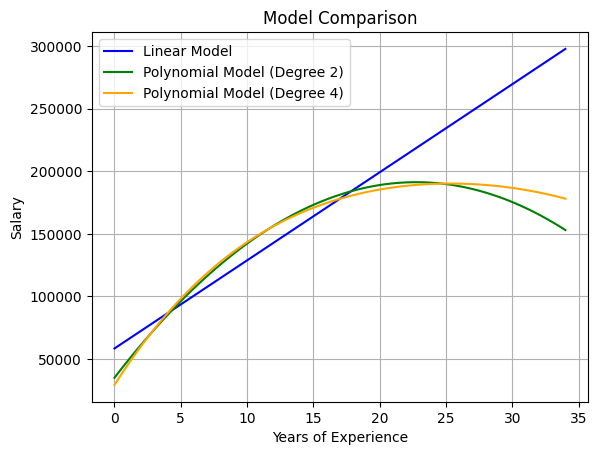

In [25]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

x_range_df = pd.DataFrame(x_range, columns=['Years of Experience'])


x_range_poly2 = poly2.transform(x_range_df)
x_range_poly4 = poly4.transform(x_range_df)

y_range_lin = lin_model.predict(x_range_df)
y_range_poly2 = poly2_model.predict(x_range_poly2)
y_range_poly4 = poly4_model.predict(x_range_poly4)

plt.scatter(x, y, color='red', label='Actual Data')
plt.plot(x_range, y_range_lin, color='blue', label='Linear Model')
plt.plot(x_range, y_range_poly2, color='green', label='Polynomial Model (Degree 2)')
plt.plot(x_range, y_range_poly4, color='orange', label='Polynomial Model (Degree 4)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Model Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Model Performance Comparison

In [26]:
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial (Degree 2)', 'Polynomial (Degree 4)'],
    'Mean Squared Error': [mse_lin, mse_poly2, mse_poly4],
    'Root Mean Squared Error': [rmse_lin, rmse_poly2,rmse_poly4],
    "r2_score":[r2_lin, r2_poly2, r2_poly4]
})

metrics_df.style.format({
    'Mean Squared Error': '{:.2f}',
    'Root Mean Squared Error': '{:.2f}',
    "r2_score":"{:.4f}"
})

,Model,Mean Squared Error,Root Mean Squared Error,r2_score
0,Linear Regression,946833177.71,30770.65,0.6670
1,Polynomial (Degree 2),726857249.72,26960.29,0.7443
2,Polynomial (Degree 4),720033651.69,26833.44,0.7467


# Support Vector Regression(SVR)

What is SVR?

Support Vector Regression is a type of support vector machine used for regression tasks instead of classification.

Unlike regular regression models(like linear regression),SVR tries to fit the best line(or curve in nonlinear